In [70]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [71]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [72]:
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

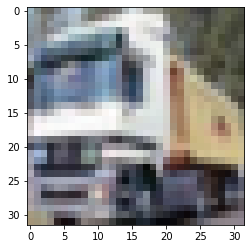

In [73]:
#checking for a image
plt.imshow(X_train[1])

In [74]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

here we see values are between 0 - 255
so we can normalize them and bring between 0 - 1

In [75]:
X_train[0]/255.0

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [76]:
#doing this for all test and train data
X_train = X_train / 255
X_test = X_test / 255

In [77]:
#since for making classification report we need y_test which is not one hot encoded therefore we store it in r_test
r_test = y_test

In [78]:
from keras.utils import np_utils

In [79]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [80]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [81]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten

In [62]:
#building a ANN 
#model creation
modelann = Sequential()
modelann.add(Dense(units=32,activation='relu',input_shape=(32,32,3)))
modelann.add(Flatten())
modelann.add(Dense(units = 400 , activation='relu'))
modelann.add(Dense(units = 100 , activation='relu'))
modelann.add(Dense(units = 10 , activation='sigmoid'))


In [63]:
modelann.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 32, 32, 32)        128       
_________________________________________________________________
flatten_13 (Flatten)         (None, 32768)             0         
_________________________________________________________________
dense_52 (Dense)             (None, 400)               13107600  
_________________________________________________________________
dense_53 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_54 (Dense)             (None, 10)                1010      
Total params: 13,148,838
Trainable params: 13,148,838
Non-trainable params: 0
_________________________________________________________________


In [64]:
#since we one hot encoded the labels therefore we use categorical crossentrophy if we hadn't hot encoded it then we would have used sparse categorical crossentrophy
modelann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [65]:
modelann.fit(X_train,y_train,epochs=6)

Epoch 1/6
1563/1563 [==============================] - 247s 157ms/step - loss: 1.8303 - accuracy: 0.3539
Epoch 2/6
1563/1563 [==============================] - 240s 153ms/step - loss: 1.3929 - accuracy: 0.5027
Epoch 3/6
1563/1563 [==============================] - 235s 150ms/step - loss: 1.2617 - accuracy: 0.5496
Epoch 4/6
1563/1563 [==============================] - 233s 149ms/step - loss: 1.1532 - accuracy: 0.5916
Epoch 5/6
1563/1563 [==============================] - 230s 147ms/step - loss: 1.0419 - accuracy: 0.6319
Epoch 6/6
1563/1563 [==============================] - 232s 148ms/step - loss: 0.9533 - accuracy: 0.6614


In [66]:
modelann.evaluate(X_test, y_test)

313/313 [==============================] - 10s 30ms/step - loss: 1.2888 - accuracy: 0.5581


[1.2887853384017944, 0.5580999851226807]

In [83]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [90]:
from sklearn.metrics import classification_report
y_pred = modelann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('\nClassification Report\n')
print(classification_report(r_test, y_pred_classes, target_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]))
#here we needed r_test not y_test


Classification Report

              precision    recall  f1-score   support

    airplane       0.58      0.64      0.60      1000
  automobile       0.71      0.66      0.68      1000
        bird       0.48      0.42      0.45      1000
         cat       0.36      0.44      0.40      1000
        deer       0.53      0.43      0.47      1000
         dog       0.43      0.54      0.48      1000
        frog       0.63      0.62      0.63      1000
       horse       0.60      0.61      0.60      1000
        ship       0.68      0.67      0.67      1000
       truck       0.66      0.56      0.61      1000

    accuracy                           0.56     10000
   macro avg       0.57      0.56      0.56     10000
weighted avg       0.57      0.56      0.56     10000



In [91]:
r_pred = modelann.predict_classes(X_test)
#required for confusion matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1847dafcd0>)

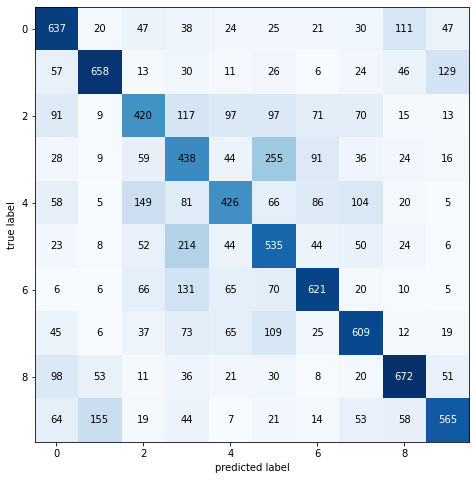

In [100]:
mat = confusion_matrix(r_test , r_pred)
plot_confusion_matrix(conf_mat = mat, show_normed=False , figsize=(10,8))

**We saw the accuracy using ANN , now we will be building a CNN and then we will compare their perfromance**

In [110]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [111]:
#building a CNN 
#we need to add layers for feature extraction before our dense connected layer (convo + reLU , pooling) then flattenning then dense connected net..

#model creation
modelcnn = Sequential()
modelcnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
modelcnn.add(MaxPooling2D(pool_size=(2,2)))
modelcnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
modelcnn.add(MaxPooling2D(pool_size=(2,2)))
#dense
modelcnn.add(Flatten())
modelcnn.add(Dense(units = 100 , activation='relu'))
modelcnn.add(Dense(units = 10 , activation='softmax'))


In [112]:
modelcnn.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 100)               230500    
_________________________________________________________________
dense_58 (Dense)             (None, 10)              

In [113]:
modelcnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [114]:
modelcnn.fit(X_train,y_train,epochs=6)

Epoch 1/6
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6548 - accuracy: 0.3935
Epoch 2/6
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1127 - accuracy: 0.6083
Epoch 3/6
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9489 - accuracy: 0.6702
Epoch 4/6
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8452 - accuracy: 0.7056
Epoch 5/6
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7518 - accuracy: 0.7372
Epoch 6/6
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6809 - accuracy: 0.7639


In [116]:
modelcnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.8880 - accuracy: 0.6974


[0.8879534006118774, 0.6973999738693237]

In [117]:
from sklearn.metrics import classification_report
y1_pred = modelcnn.predict(X_test)
y1_pred_classes = [np.argmax(element) for element in y1_pred]
print('\nClassification Report\n')
print(classification_report(r_test, y1_pred_classes, target_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]))
#here we needed r_test not y_test


Classification Report

              precision    recall  f1-score   support

    airplane       0.67      0.80      0.73      1000
  automobile       0.80      0.83      0.81      1000
        bird       0.57      0.65      0.61      1000
         cat       0.51      0.55      0.53      1000
        deer       0.71      0.55      0.62      1000
         dog       0.67      0.51      0.58      1000
        frog       0.78      0.76      0.77      1000
       horse       0.70      0.76      0.73      1000
        ship       0.79      0.81      0.80      1000
       truck       0.79      0.77      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



**We see CNN gives a better accuracy for same epochs , ANN gives accuracy of 56 whereas CNN gives accuracy of 70**


In [120]:
r1_pred = modelcnn.predict_classes(X_test)
#required for confusion matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f18448cef90>)

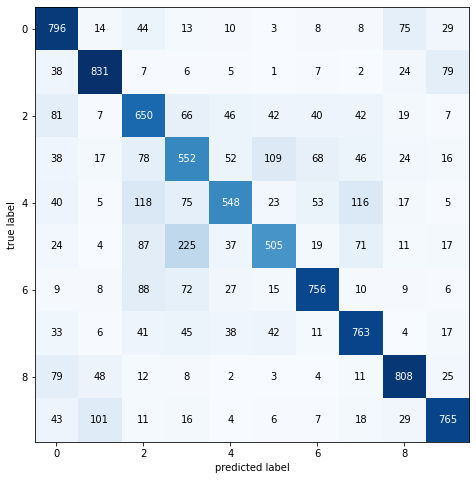

In [121]:
#confusion matrix
mat = confusion_matrix(r_test , r1_pred)
plot_confusion_matrix(conf_mat = mat, show_normed=False , figsize=(10,8))

**Testing our model using test data set**


In [137]:
r_test[0:5].reshape(-1)

array([3, 8, 8, 0, 6], dtype=uint8)

In [138]:
y1_pred = modelann.predict(X_test)
y1_pred[0:5]

array([[1.6815978e-01, 1.2328833e-02, 7.9659897e-01, 9.6445119e-01,
        4.7115508e-01, 8.8147879e-01, 7.4850321e-03, 4.7319371e-01,
        4.9997973e-01, 6.2585324e-02],
       [6.2672091e-01, 8.0447531e-01, 1.1325610e-01, 2.7896968e-01,
        1.9925892e-01, 1.1587554e-01, 2.4676204e-02, 1.0596162e-01,
        9.6059585e-01, 8.5675693e-01],
       [9.1203856e-01, 5.4998416e-01, 6.0968727e-01, 3.4596148e-01,
        4.8174548e-01, 1.3059852e-01, 3.2322526e-02, 4.1024223e-01,
        9.1856134e-01, 6.0227108e-01],
       [8.4540415e-01, 1.4638993e-01, 8.0002630e-01, 6.1785096e-01,
        7.5211728e-01, 3.1319365e-01, 2.4915397e-02, 5.4062879e-01,
        7.5386083e-01, 2.0361909e-01],
       [1.4532357e-02, 7.9461932e-04, 9.4217432e-01, 9.3984699e-01,
        9.9207330e-01, 9.0418315e-01, 9.8848146e-01, 1.6880706e-01,
        5.6054294e-02, 4.1262805e-03]], dtype=float32)

In [139]:
y1_classes = [np.argmax(element) for element in y1_pred]
y1_classes[0:5]

[3, 8, 8, 0, 4]

We see that for 5th image it gives wrong output for others it gives accurate output